# Filtro de Kalman
* Sofía Salgarriaga Jiménez
* Pablo Osorio López
* Paola Andrea Fernández López
* Juliana Vallejo Díez
* Nicolás Villegas Vargas
* María Camila Vásquez Correa

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
np.random.standard_cauchy()
np.random.lognormal()

1.073932130135761

**Simulación GLM**

In [50]:
A = np.matrix([[.75,-0.25],[.2,.3]])
D = np.matrix([[1,0],[0,1]])

In [95]:
nobs= 250
X = np.zeros((nobs,2))
e1 = np.random.lognormal(size=nobs)
e2 = np.random.lognormal(size=nobs)
X[0] = np.array([-1,1])
for i in range(1,nobs):
    X[i] = A@X[i-1] + D@[e1[i],e2[i]]

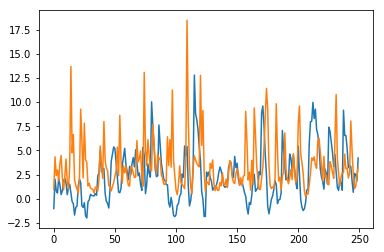

In [96]:
plt.plot(X)
plt.show()

## Filtro

In [108]:
# Inicialización
F = np.matrix([[0.1,0],[0.001,0.0021]])
H = np.matrix([[1,0],[0,1]])
Z = np.zeros((nobs,2))
Z1 = np.zeros((nobs,2))
Sigma = np.matrix([[0,0],[0,0]])
Sigma1 = np.matrix([[0,0],[0,0]])
Z[0] = np.matrix([0,0])
Q = 2*np.eye(2)
R = np.eye(2)

In [121]:
for i in range(0,nobs-1):
#i = 0
#if 1:
    # Predicción
    Z1[i] = F@Z[i]
    Sigma1 = F@Sigma@F.T + Q
    # Corrección
    Mt = Sigma1@H.T@np.linalg.inv(H@Sigma1@H.T + R)
    Z[i+1] = Z1[i] + (Mt@(X[i]-Z1[i]-H@Z1[i]).T).T
    Sigma = Sigma1@H.T@np.linalg.inv(H@Sigma1@H.T+R)

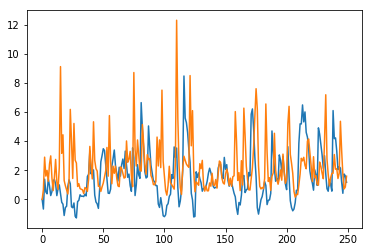

In [185]:
plt.plot(Z)
plt.show()

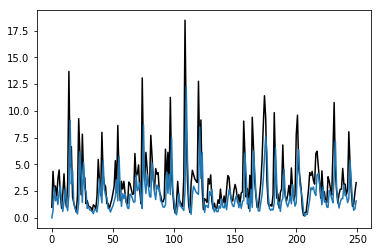

In [186]:
plt.plot(X.T[1], 'black')
plt.plot(Z.T[1])
plt.show()

In [184]:
np.max(np.abs((Z.T[1]-X.T[1])))

15.936370017800794

In [137]:
from pykalman import KalmanFilter as KF

In [169]:
kf = KF(transition_matrices = F, observation_matrices = H, transition_covariance=R,
    observation_covariance=Q,)

In [170]:
kf = kf.em(X, n_iter=nobs)

In [171]:
(FX, filtered_state_covariances) = kf.filter(X)
(SX, smoothed_state_covariances) = kf.smooth(X)

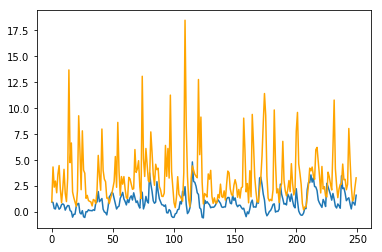

In [187]:
plt.plot(FX.T[1])
plt.plot(X.T[1],'orange')
plt.show()

In [183]:
np.min((FX.T[1]-X.T[1]))

-16.0149285804797